# Исследование объявлений о продаже квартир

Необходимо определить параметры, влияющие на рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Данные получены с сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Информация о входных данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации (руб)
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*Пояснение:* апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### План исследования
1. Изучить общую информацию о данных
1. Найти пропуски в данных, выбивающиеся значения и дубликаты.
1. Обработать пропуски в данных, выбивающиеся значения и дубликаты.
1. Определить подходящий формат данных для каждой переменной.
1. Добавить необходимые для анализа столбцы и разбить на категории.

### Шаг 1. Изучаем общую информацию

In [19]:
import pandas as pd
import seaborn as sns
import scipy.stats
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 9999 # чтобы скролить таблицу по горизонтали

# чтобы не всплывали SettingWithCopyWarning
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [20]:
realty = pd.read_csv('real_estate_data.csv', sep='\t')

In [21]:
realty.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20341,1,2999000.0,36.0,2015-09-09T00:00:00,1,NaN,17.0,NaN,6,NaN,False,False,NaN,0.0,посёлок Шушары,13456.0,19242.0,0.0,NaN,1.0,807.0,436.0
1394,6,2570000.0,53.0,2017-05-01T00:00:00,2,NaN,5.0,29.5,3,False,False,False,9.0,1.0,деревня Большие Колпаны,NaN,NaN,NaN,NaN,NaN,NaN,45.0
10930,17,4490000.0,50.4,2017-01-20T00:00:00,2,2.60,16.0,26.9,1,NaN,False,False,7.3,0.0,Санкт-Петербург,48717.0,16555.0,0.0,NaN,0.0,NaN,302.0
18432,2,4300000.0,77.0,2017-05-26T00:00:00,3,2.65,25.0,46.0,15,NaN,False,False,8.0,5.0,посёлок Шушары,11226.0,17012.0,0.0,NaN,0.0,NaN,167.0
19618,3,2700000.0,29.0,2018-03-15T00:00:00,1,2.55,12.0,16.0,8,NaN,False,False,6.3,2.0,Санкт-Петербург,16363.0,16271.0,0.0,NaN,1.0,98.0,158.0


In [22]:
realty.duplicated().sum()

0

In [23]:
realty.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [24]:
realty.corr()
# пропуски в площади кухни и жилой площади можно заполнить, исходя из их отношения к общей площади

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


#### Ошибки в данных:
- <font color='green'> ceiling_height </font>: пропуски в 39% случаях, заменим на типичное значения от высоты дома; есть нефизичные значение более 4 метров и менее 2 метров, в сумме 0.4%, удалим их;
- <font color='green'> floors_total </font>: пропуски в 0.4% случаях СКОЛЬКО, удалим их;
- <font color='green'> living_area </font>: пропуски в 8% случаях, заполним на расчетное значение в зависимости от общей площади; есть странные объекты с жилой площадью менее 10 м2, удалим их; 
- <font color='green'> is_apartment </font>: пропуски в 88% случаях; если пользователь не указал, то, скорее всего, это не апартаменты, заменим на нули;
- <font color='green'> kitchen_area </font>: пропуски в 10% случаях, заполним на расчетное значение в зависимости от общей площади;
- <font color='green'> balcony </font>: пропуски в 49% случаях; если пользователь не указал, то, скорее всего, балконов нет, заменим на нули;
- <font color='green'> locality_name </font>: пропуски в 0.2% случаях, заполним исходя из данных по расстоянию до центра (менее 12 км считаем Санкт-Петербург);
- <font color='green'> airports_nearest </font>: пропуски в 23% случаях;
- <font color='green'> cityCenters_nearest </font>: пропуски в 23% случаях;
- <font color='green'> parks_around3000 </font>: пропуски в 49% случаях;
- <font color='green'> parks_nearest </font>: пропуски в 66% случаях;
- <font color='green'> ponds_around3000 </font>: пропуски в 23% случаях;
- <font color='green'> ponds_nearest </font>: пропуски в 62% случаях;
- <font color='green'> days_exposition </font>: пропуски в 13% случаях;
- <font color='green'> rooms </font>: очень мало значений для объектов с количеством комнат 7 и более, выборка по ним будет нерепрезентативна; 
- <font color='green'> total_area </font>: есть выбивающиеся значения с площадью более 300м2;
- <font color='green'> last_price </font>: в строке 8793 есть очень низкое значение небъющееся с площадью (цена 12190 руб при площади 109 м2), есть выбивающиеся значения с ценой более 30 млн;
- для <font color='green'> first_day_exposition, floors_total, balcony, studio, open_plan, is_apartment</font> нужно заменить тип данных на более подходящий.

### Шаг 2. Предобработка данных

In [25]:
# добавим id к каждому объекту
realty['id'] = [i for i in range(realty.shape[0])]

# если кол-во балконов не указано, то скорее всего их нет, заменяем на нули
realty['balcony'] = realty['balcony'].fillna(0)
# для количества балконов выбираем целочисленный тип данных, т.к. их не может быть "полтора"
realty['balcony'] = realty['balcony'].astype('int64')

# если человек не указал, что это апартаменты, то скорее всего это не апартаменты,
# поэтому заменяем NaN на False и переводим тип данных из object в int
realty['is_apartment'] = realty['is_apartment'].fillna(False).astype('int64')

# для удобства работы здесь переводим тип данных из boolean в int
realty['studio'] = realty['studio'].astype('int64')
realty['open_plan'] = realty['open_plan'].astype('int64')

# переводим тип данных цены из float в int, т.к. тут точность до копеек избыточна 
realty['last_price'] = realty['last_price'].astype('int64')

# изменим тип данных для first_day_exposition из object на datetime
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

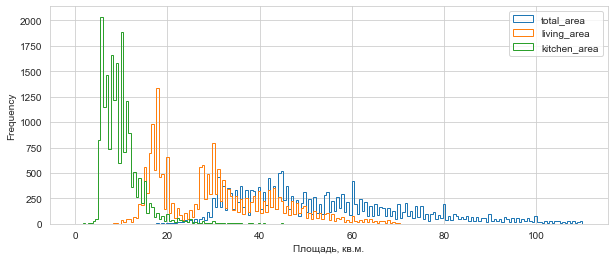

In [26]:
# найдем и удалим из датафрейма, выбивающиеся значения общей площади
# считаем межквартильный размах
IQR = (realty['total_area'].quantile(q=0.75) - realty['total_area'].quantile(q=0.25))
low_limit = realty['total_area'].quantile(q=0.25) - 1.5*IQR
high_limit = realty['total_area'].quantile(q=0.75) + 1.5*IQR
# итого удалено 1149 объектов или 5% от общего числа
realty = realty.query('total_area <= @high_limit')

# таким же образом найдем и удалим объекты с выбросами в жилой площади (50 шт или 0.2% от общего)
realty = realty.query('living_area < 70')

# посмотрим на распределения всех трех типов площадей
realty.plot(kind='hist', y=['total_area', 'living_area', 'kitchen_area'], 
        bins=200, label=['total_area', 'living_area', 'kitchen_area'], histtype='step',  
        grid=True, legend=True, range=(0, 110), figsize=(10, 4))
plt.xlabel('Площадь, кв.м.')
plt.show()

In [27]:
# удалим строки с пропусками в floors_total (50 объектов или 0.3%)
realty.dropna(subset=['floors_total'], inplace=True)

### Обработка пропусков в жилой площади

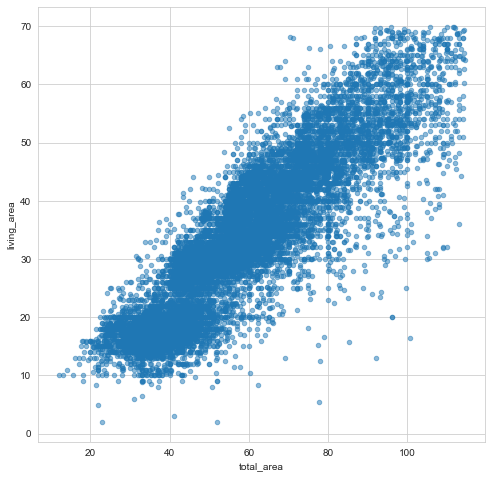

In [28]:
# заполняем пропуски в living_area:
# т.к. взаимосвязь между living_area и total_area значимая
realty.plot(x='total_area', y='living_area', kind='scatter', grid=True, alpha=0.5)

# то считаем медиану для отношения жилой площади к общей
realty['living_to_total'] = realty['living_area'] / realty['total_area']
live_to_total_med = realty['living_to_total'].median()

# считаем жилую площадь для каждого объекта с пропущенным значением living_area
realty['living_area'] = realty['living_area'].fillna(live_to_total_med * realty['total_area']).round(2)
realty['living_to_total'] = realty['living_to_total'].fillna(live_to_total_med)


### Обработка пропусков в площади кухни

In [29]:
# добавим соотношение площади кухни к общей площади
realty['kitchen_to_total'] = (realty['kitchen_area'] / realty['total_area']).round(2)

# считаем медиану для отношения площади кухни к общей
kitchen_to_total_med = realty['kitchen_to_total'].median()

# считаем площадь кухни для каждого объекта с пропущенным значением
realty['kitchen_area'] = realty['kitchen_area'].fillna(kitchen_to_total_med * realty['total_area']).round(2)
realty['kitchen_to_total'] = realty['kitchen_to_total'].fillna(live_to_total_med)

### Обработка пропусков в высоте потолков

In [32]:
# обработаем выбивающиеся значения для объектов с количеством этажей 36 и 33
realty.loc[realty['floors_total'] == 36, 'ceiling_height'] = 2.7
realty.loc[realty['floors_total'] == 33, 'ceiling_height'] = 2.7

In [38]:
# оставляем в realty только значения с высотой потолков (2, 4] и те, что неизвестны (NaN)
realty1 = realty[realty['ceiling_height'].isna()]
realty2 = realty.query('ceiling_height > 2 and ceiling_height <= 4')

realty = realty1.merge(realty2, how='outer')

In [39]:
# посмотрим глазками на распределение высоты потолоков в зависимости от этажности здания
print(realty
    .groupby('floors_total')['ceiling_height']
    .agg(['count', 'median'])
    .reset_index().sort_values('count', ascending=False).head()
    )

# заменим пропуски в высоте потолков на медианное значение для соответствующего количества этажей 
for floor_total, group in realty.groupby('floors_total')['ceiling_height']:
    realty.loc[(realty['floors_total'] == floor_total)&(realty['ceiling_height'].isna()), 'ceiling_height'] = group.median()

# для себя https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html (split-apply-combine)

    floors_total  count  median
4            5.0   3197    2.55
8            9.0   2397    2.55
11          12.0    788    2.65
15          16.0    774    2.70
9           10.0    683    2.60


###  Обработка пропусков в названии населенного пункта

In [40]:
# среднее расстояние, чтобы отнести объект к Санкт-Петербургу
spb_median = realty.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].median()
realty.loc[realty['cityCenters_nearest'] < spb_median, 'locality_name'] = 'Санкт-Петербург'
# остальные безымянные объекты 18 шт. удаляем, т.к. непонятно в какую сторону применять данные по расстоянию
realty.dropna(subset=['locality_name'], inplace=True)

### Обработка пропусков в удаленности квартир от центра

In [41]:
# посчитаем среднее расстояние до центра для каждого населенного пункта
# и заменим им пропуски в расстояниях
for loc_name, group in realty.groupby('locality_name')['cityCenters_nearest']:
    realty.loc[(realty['locality_name'] == loc_name)&(realty['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = group.median()

# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

### Вывод
- пропуски в жилой площади и площади кухни заполнены по медиане отношения к общей площади;
- пропуски в высоте потолков заполенены исходя из типичной высоты потолоков для здания данной этажности;
- в геоданных пропуски в удаленности от центра заполнены, где возможно, на медианное значение характерное для данного населенного пункта; 
- пропуски в количестве балконов и поле апартаментов заменены на нули;
- заменены типы данных для количества балконов, цены, типа планировки, даты публикации объявления.

### Шаг 3. Посчитайте и добавьте в таблицу

In [42]:
# добавим столбец с ценой квадратного метра
realty['meter_price'] = (realty['last_price'] / realty['total_area']).astype('int')

In [43]:
# добавим день недели, месяц и год публикации объявления;
realty['weekday'] = realty['first_day_exposition'].dt.weekday
realty['month'] = pd.DatetimeIndex(realty['first_day_exposition']).month
realty['year'] = pd.DatetimeIndex(realty['first_day_exposition']).year

In [44]:
# введем новые категории для этажа квартиры 
def assign_floor_category(row):
    """Разбивает варианты этажа квартир на категории: первый, последний, другой"""
    last_floor = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == last_floor:
        return 'последний'
    else:
        return 'другой'

# добавим их в датафрейм
realty['floor_category'] = realty.apply(assign_floor_category, axis=1)

In [45]:
# поменяем столбцы местами для удобства представления
realty = realty[['last_price', 'meter_price', 
       'first_day_exposition', 'weekday', 'month', 'year', 'days_exposition',
       'floor', 'floors_total', 'floor_category', 'rooms', 'ceiling_height', 
       'total_area', 'living_area', 'living_to_total', 'kitchen_area', 'kitchen_to_total',
       'is_apartment', 'studio', 'open_plan',  'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'total_images']]

realty.head()

,last_price,meter_price,first_day_exposition,weekday,month,year,days_exposition,floor,floors_total,floor_category,rooms,ceiling_height,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,is_apartment,studio,open_plan,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images
0,3350000,82920,2018-12-04,1,12,2018,81.0,1,11.0,первый,1,2.74,40.40,18.60,0.460396,11.00,0.27,0,0,0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,7
1,5196000,92785,2015-08-20,3,8,2015,558.0,4,5.0,другой,2,2.55,56.00,34.30,0.612500,8.30,0.15,0,0,0,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,10
2,2890000,95065,2018-09-10,0,9,2018,55.0,5,12.0,другой,1,2.65,30.40,14.40,0.473684,9.10,0.30,0,0,0,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,10
3,3700000,99195,2017-11-02,3,11,2017,155.0,6,26.0,другой,1,2.66,37.30,10.60,0.284182,14.40,0.39,0,0,0,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,6
4,2900000,87454,2018-05-23,2,5,2018,189.0,26,27.0,другой,1,2.70,33.16,15.43,0.465320,8.81,0.27,0,0,0,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,20


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

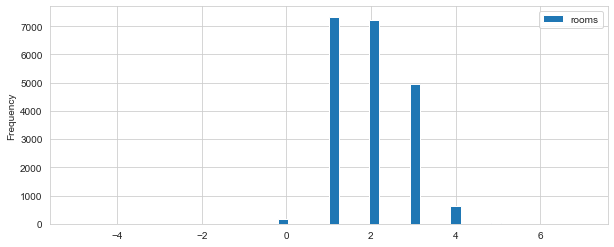

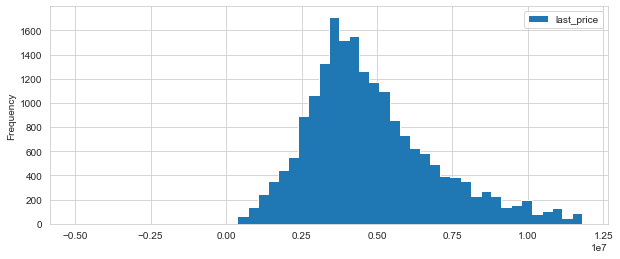

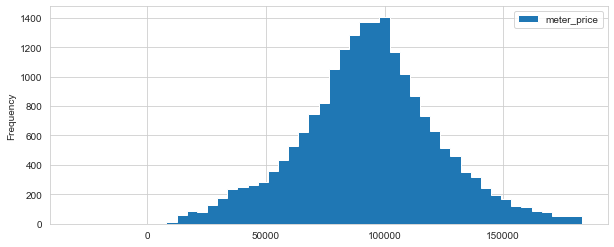

In [46]:
# посмотрим на гистограммы
select = realty[['rooms', 'last_price', 'meter_price']]
for column in select:
    #plt.figure()
    Q1, Q3 = select[column].quantile(0.25), select[column].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 3*IQR, Q1 + 3*IQR 
    select.plot(kind='hist', y=[column], range=(lower, upper), bins=50, histtype='stepfilled', grid=True, figsize=(10, 4))  

In [47]:
# уберем нерепрезентативные значения с количеством комнат больше 6 
# (всего таких объектов 90 шт. или 0.38% от общего числа)
realty = realty.query('rooms <= 6')

# удаляем выбивающиеся значения стоимости  квартир
realty = realty.query('last_price <= 2.0E+7')

# итого удаляем выбивающиеся значения цены квадратного метра
realty = realty.query('meter_price <= 300000')

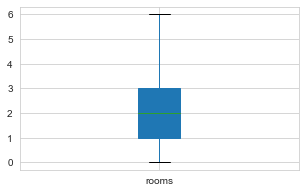

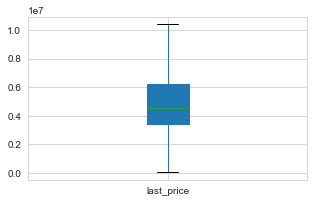

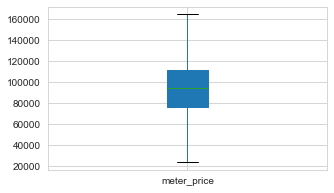

In [50]:
# итоговые boxplots
select = realty[['rooms', 'last_price', 'meter_price']]
for column in select:
    plt.figure(figsize=(5,3))
    select.boxplot([column], showfliers=False, patch_artist=True)

### Еще раз стоимость квадратного метра через seaborn

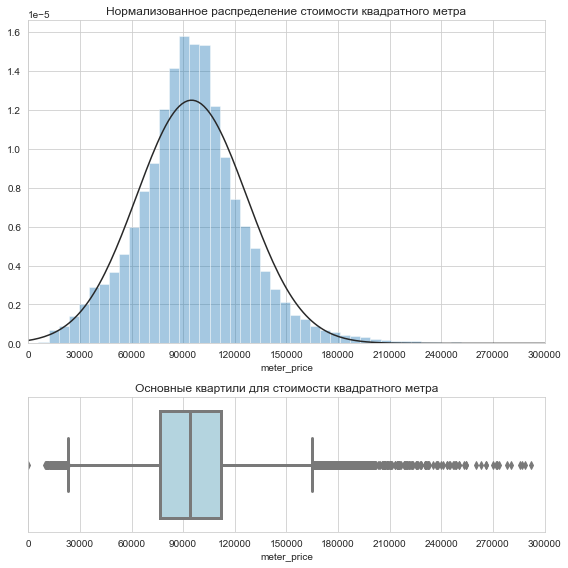

In [52]:
figsize(8, 8)
ax1 = subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = subplot2grid((3, 1), (2, 0))

sns.distplot(realty.meter_price, fit=scipy.stats.norm, ax=ax1, kde=False)
ax1.set_xlim(0, 300000)
ax1.set_xticks(np.linspace(0, 300000, 11))
ax1.set_title("Нормализованное распределение стоимости квадратного метра")

sns.boxplot(realty.meter_price, ax=ax2, linewidth=3, color='lightblue')
ax2.set_xlim(0, 300000)
ax2.set_xticks(np.linspace(0, 300000, 11))
ax2.set_title("Основные квартили для стоимости квадратного метра")
tight_layout()

#### Среднее время продажи квартиры

count    17639.000000
mean       177.703385
std        213.517382
min          1.000000
25%         43.000000
50%         97.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

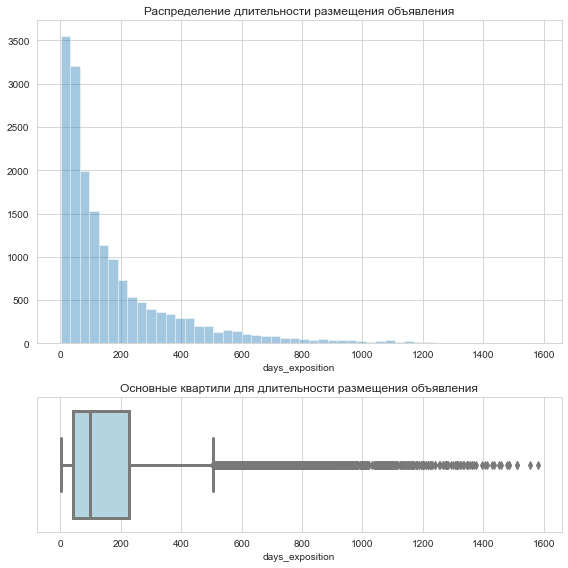

In [55]:
figsize(8, 8)
ax1 = subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = subplot2grid((3, 1), (2, 0))

sns.distplot(realty[realty['days_exposition'].notna()].days_exposition, ax=ax1, kde=False)
ax1.set_title("Распределение длительности размещения объявления")

sns.boxplot(realty[realty['days_exposition'].notna()].days_exposition, ax=ax2, linewidth=3, color='lightblue')
ax2.set_title("Основные квартили для длительности размещения объявления")
tight_layout()

realty['days_exposition'].describe()

# считаем что сделки прошли быстро, если объявление было активно до 42 дней, 
# если объявление экспонируется более 224 дней, то считаем сделку долгой.

#### Факторы влияющие на стоимость квартиры и цену одного квадратного метра: удаленность от центра

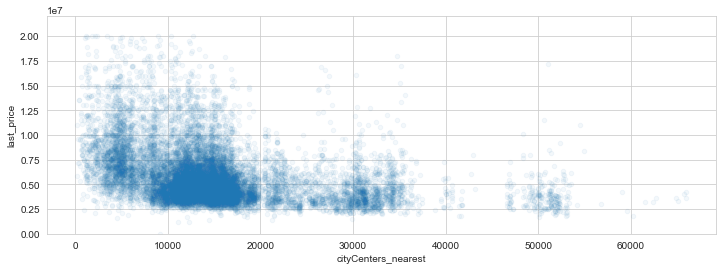

In [58]:
# есть ли зависимость стоимости квартиры от удаленности от центра
realty.plot(kind='scatter', x='cityCenters_nearest', y='last_price', ylim=(0, 2.2E+7), 
        alpha=0.05, figsize=(12,4), grid=True)
plt.show()


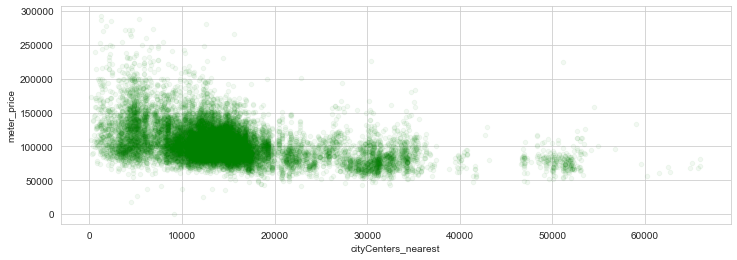

In [57]:
# похожая картина для цены квадратного метра
realty.plot(kind='scatter', x='cityCenters_nearest', y='meter_price', color='green',
        alpha=0.05, figsize=(12,4), grid=True)
plt.show()

- в общем видно, что чем ближе к центру тем медианное значение цены выше, однако посмотрим более подробно по каждому населенному пунту и с разбивкой по количеству комнат

In [59]:
# для этого посчитаем среднее расстояние до центра для каждого населенного пункта, по которому есть данные
median_distances = (realty
                    .pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='median')
                    .sort_values(by='cityCenters_nearest')
                    .reset_index()
                    )

localities = median_distances['locality_name'].tolist()

median_distances

,locality_name,cityCenters_nearest
0,Санкт-Петербург,12590.0
1,посёлок Парголово,19311.0
2,посёлок Стрельна,23498.5
3,посёлок Шушары,24247.0
4,посёлок Песочный,26099.5
5,посёлок Александровская,27352.0
6,посёлок Металлострой,27619.0
7,Пушкин,27850.0
8,посёлок Лисий Нос,28226.0
9,посёлок Усть-Ижора,28233.0


In [60]:
# для этого посчитаем среднее расстояние до центра для каждого населенного пункта, по которому есть данные
median_distances = realty.pivot_table(index='locality_name', 
                             values='cityCenters_nearest', aggfunc='median').reset_index()

localities = median_distances['locality_name'].tolist()

# определим для них среднюю стоимость квартиры и цену квадратного метра в данном населенном пункте 
# в зависимости от количества комнат 
median_prices = (realty
     .query('locality_name in @localities')
     .pivot_table(index=['locality_name', 'rooms'], values=['last_price', 'meter_price'], aggfunc='median')
     .reset_index()
     )

median_prices

,locality_name,rooms,last_price,meter_price
0,Зеленогорск,1,3500000,111842.0
1,Зеленогорск,2,5175000,103995.5
2,Зеленогорск,3,6177600,88000.0
3,Колпино,1,2890000,82865.0
4,Колпино,2,3600000,75000.0
...,...,...,...,...
68,посёлок Шушары,0,3200000,123076.0
69,посёлок Шушары,1,3199000,83333.0
70,посёлок Шушары,2,4200000,76250.5
71,посёлок Шушары,3,5225000,67469.0


In [61]:
# объдиним таблицы и отсортируем по расстоянию до центра
median_prices = (median_prices
    .merge(median_distances, on='locality_name')
    .sort_values(by='cityCenters_nearest')
    #.reset_index(drop=True)
    )

#### Факторы влияющие на стоимость квартиры и цену одного квадратного метра: число комнат

,rooms,last_price,meter_price
0,0,2700000,105058
1,1,3600000,100000
2,2,4750000,92812
3,3,5911757,87301
4,4,6700000,83753
5,5,7600000,79625
6,6,6100000,70114


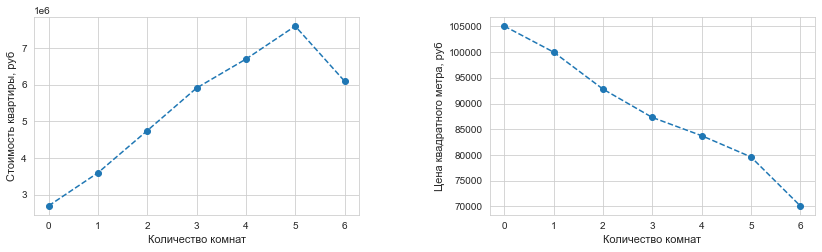

In [64]:
# зависимость стоимости квартиры и цены квадратного метра от числа комнат
price_by_room = (realty
    .pivot_table(index='rooms', values=['last_price', 'meter_price'], aggfunc='median')
    .reset_index()
    )

 
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace = 0.4)
# Стоимость квартир
plt.subplot(221)
plt.plot(price_by_room['rooms'], price_by_room['last_price'], linestyle='--', marker='o')
plt.grid(True)
plt.xlabel("Количество комнат", fontsize=11)
plt.ylabel("Стоимость квартиры, руб", fontsize=11)

# Цена квадратного метра
plt.subplot(222)
plt.plot(price_by_room['rooms'], price_by_room['meter_price'], linestyle='--', marker='o')
plt.grid(True)
plt.xlabel("Количество комнат", fontsize=11)
plt.ylabel("Цена квадратного метра, руб", fontsize=11)


# держим таблицу перед глазами
price_by_room

# для значений с числом комнат более 6 мало, доверять им не стоит

#### Факторы влияющие на стоимость квартиры и цену одного квадратного метра: этаж

In [65]:
# зависимость стоимости квартиры и цены квадратного метра от этажа
realty.pivot_table(index='floor_category', values=['last_price', 'meter_price'], aggfunc='median').reset_index()

,floor_category,last_price,meter_price
0,другой,4650000,97435.0
1,первый,3880000,81022.0
2,последний,4100000,86372.5


#### Факторы влияющие на цену квадратного метра: день недели, месяц, год

,count,median
,meter_price,meter_price
weekday,,
0,3119,94186
1,3615,94736
2,3369,94540
3,3659,93925
4,3443,93750
5,1624,92289
6,1417,93891


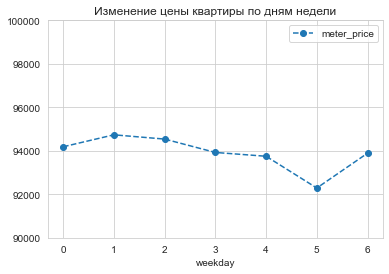

In [71]:
# зависимость цены квадратного метра от дня недели 
realty.pivot_table(
    index='weekday', 
    values='meter_price', 
    aggfunc='median').plot(style='o', title='Изменение цены квартиры по дням недели', ylim=(90000, 100000), linestyle='--', figsize=(6, 4))

realty.pivot_table(
    index='weekday', 
    values='meter_price', 
    aggfunc=['count', 'median'])

,count,median
,meter_price,meter_price
month,,
1,1236,95032.5
2,2206,94680.0
3,2199,94327.0
4,2067,95588.0
5,1108,91894.0
6,1497,91836.0
7,1423,93750.0
8,1515,94900.0


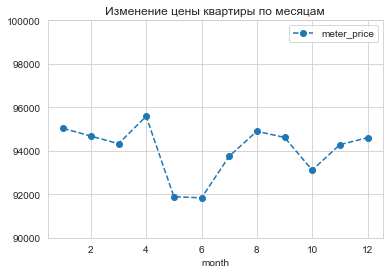

In [72]:
# зависимость цены квадратного метра от месяца
realty.pivot_table(
    index='month', 
    values='meter_price', 
    aggfunc='median').plot(style='o', ylim=(90000, 100000), title='Изменение цены квартиры по месяцам', linestyle='--', figsize=(6, 4))

realty.pivot_table(
    index='month', 
    values='meter_price', 
    aggfunc=['count', 'median'])

,count,median
,meter_price,meter_price
year,,
2014,96,101992.5
2015,967,91061.0
2016,2430,90681.0
2017,7125,91580.0
2018,7103,95512.0
2019,2525,102465.0


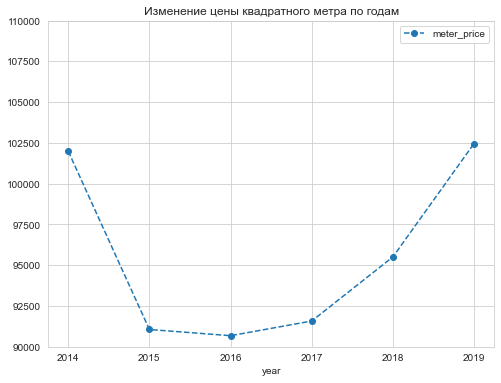

In [73]:
# зависимость цены квадратного метра от года
realty.pivot_table(
    index='year', 
    values='meter_price', 
    aggfunc='median').plot(style='o', ylim=(90000, 110000), title='Изменение цены квадратного метра по годам', linestyle='--', figsize=(8, 6))

realty.pivot_table(
    index='year', 
    values='meter_price', 
    aggfunc=['count', 'median'])

In [74]:
# получим численную оценку влияния выбранных параметров на цену квадратного метра
coef = realty[['meter_price', 'weekday', 'month', 'year', 'floor_category', 'rooms', 'cityCenters_nearest']].corr()
coef

,meter_price,weekday,month,year,rooms,cityCenters_nearest
meter_price,1.000000,-0.010750,-0.005394,0.067265,-0.150866,-0.407865
weekday,-0.010750,1.000000,0.012165,-0.007483,-0.000906,0.008802
month,-0.005394,0.012165,1.000000,-0.255238,-0.004074,-0.015600
year,0.067265,-0.007483,-0.255238,1.000000,-0.027986,0.015094
rooms,-0.150866,-0.000906,-0.004074,-0.027986,1.000000,-0.086511
cityCenters_nearest,-0.407865,0.008802,-0.015600,0.015094,-0.086511,1.000000


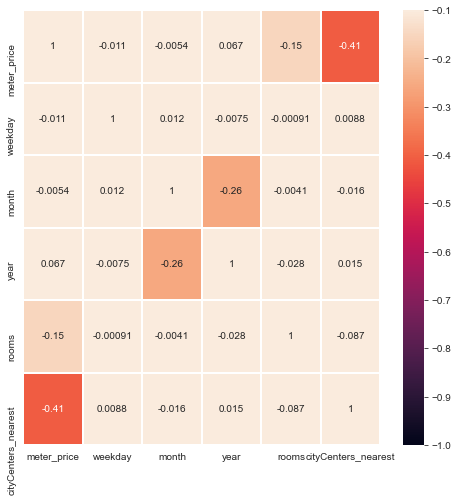

In [76]:
ax = sns.heatmap(coef, linewidths=1, vmin=-1, vmax=-0.1, annot=True)
# цена квадратного метра наиболее зависит от количества комнат и близости к центру

#### Средняя цена квадратного метра (ТОП10)

,locality_name,count,median
0,Санкт-Петербург,13209,103333.0
1,Зеленогорск,22,101666.5
2,Кудрово,159,100000.0
3,Сестрорецк,156,99879.5
4,Пушкин,321,99706.0
5,деревня Кудрово,261,92539.0
6,посёлок Парголово,301,91642.0
7,деревня Мистолово,9,90229.0
8,Мурино,31,89928.0
9,посёлок Стрельна,40,87322.5


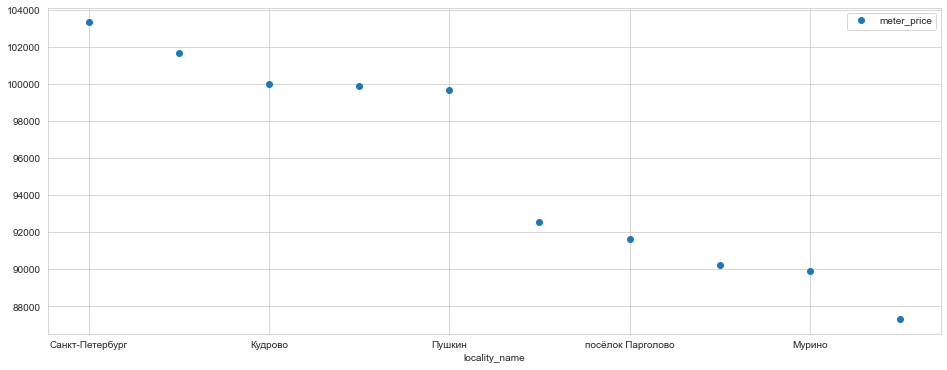

In [77]:
(realty.groupby('locality_name')['meter_price'].agg('median')
     .reset_index().sort_values(by='meter_price', ascending=False).head(10)
     .plot(x='locality_name', y='meter_price', style='o', figsize=(16, 6))
)

(realty
    .groupby('locality_name')['meter_price']
    .agg(['count', 'median'])
    .sort_values(by='median', ascending=False)
    .head(10).reset_index()
)

#### Определяем радус центра Санкт-Петербурга и влияние расстояния на цену 

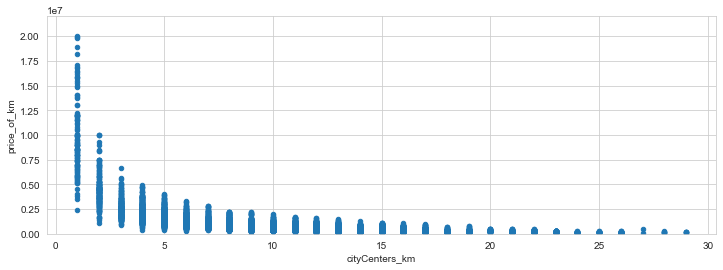

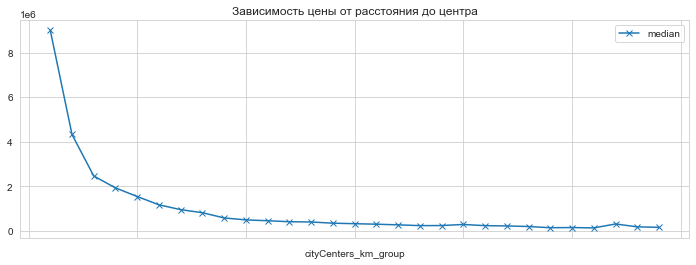

In [78]:
# оставим только данные по Санкт-Петербургу, добавим столбцы стоимости километра
realty_spb = realty.query('locality_name == "Санкт-Петербург"')
realty_spb['cityCenters_km'] = (realty_spb['cityCenters_nearest'] / 1000).round()
realty_spb['price_of_km'] = (realty_spb['last_price'] / realty_spb['cityCenters_km']).round()

# определим центральную зону, где цена резко растет вверх
# посмотрим на зависимость цены от расстояния
(realty_spb
    .sort_values(by='cityCenters_km')
    .plot(x='cityCenters_km', y='price_of_km', kind='scatter', ylim=(0, 2.2E+7), figsize=(12, 4))
)

# излом на scatterplot плохо видно, поэтому 
# разобъем квартиры на 30 групп в зависимости от расстояния (в каждой группе по 1 км)
realty_spb['cityCenters_km_group'] = pd.cut(realty_spb['cityCenters_km'], 30)

realty_spb_grouped = (realty_spb
                  .groupby('cityCenters_km_group')['price_of_km'].agg(['median'])
                  .plot(style='x-', figsize=(12, 4), title='Зависимость цены от расстояния до центра')
                 )

# по графику глазками находим излом в районе радуса в 4 км
center_radius = 4

### Сравнение квартир в центре СПб с квартирами по всему городу

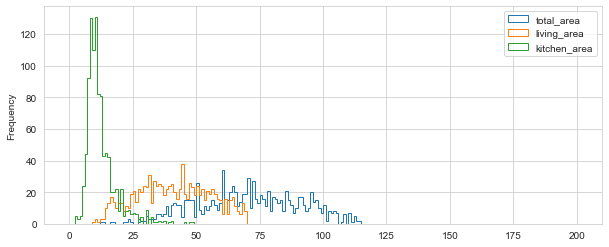

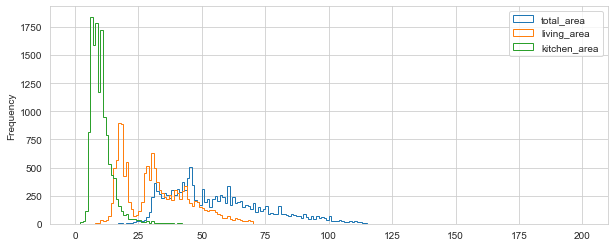

In [79]:
realty_spb_center = realty_spb.query('cityCenters_km <= @center_radius')

for df in [realty_spb_center, realty_spb]:
    (df.plot(kind='hist', y=['total_area', 'living_area', 'kitchen_area'], 
    bins=200, label=['total_area', 'living_area', 'kitchen_area'], histtype='step',  
    grid=True, range=(0, 200), legend=True, figsize=(10, 4))
    )

### Цена квадратного метра в центре СПб и по всему СПб от количества комнат

Text(0, 0.5, 'Цена квадратного метра, руб')

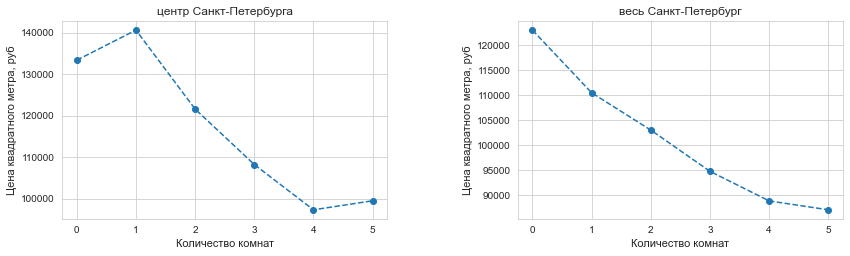

In [80]:
# сгруппируем по количеству комнат
center = realty_spb_center.pivot_table(index='rooms', values='meter_price', aggfunc='median').reset_index()
total = realty_spb.pivot_table(index='rooms', values='meter_price', aggfunc='median').reset_index()

plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace = 0.4)

# Центр СПб
plt.subplot(221)
plt.plot(center['rooms'], center['meter_price'], linestyle='--', marker='o')
plt.grid(True)
plt.title('центр Санкт-Петербурга')
plt.xlabel("Количество комнат", fontsize=11)
plt.ylabel("Цена квадратного метра, руб", fontsize=11)

# Весь СПБ
plt.subplot(222)
plt.plot(total['rooms'], total['meter_price'], linestyle='--', marker='o')
plt.grid(True)
plt.title('весь Санкт-Петербург')
plt.xlabel("Количество комнат", fontsize=11)
plt.ylabel("Цена квадратного метра, руб", fontsize=11)

### Цена квадратного метра в центре и по всему СПб  в зависимости от общей площади

In [82]:
# разобъем квартиры группы в зависимости от площади
realty_spb['total_area_group'] = pd.cut(realty_spb['total_area'], 10)
realty_spb_gr = realty_spb.groupby('total_area_group')['meter_price'].agg('median').reset_index()

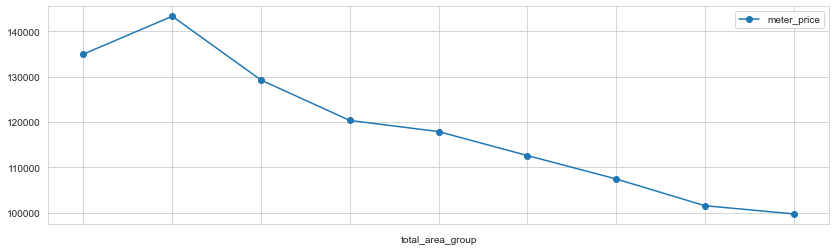

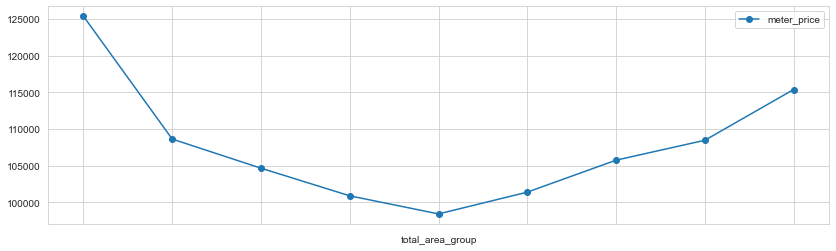

In [83]:
# разделим на группы по общей площади для центра СПб и всего СПб
realty_spb_center['total_area_group'] = pd.cut(realty_spb_center['total_area'], 9)
realty_spb_center_gr = realty_spb_center.groupby('total_area_group')['meter_price'].agg('median').reset_index()

realty_spb['total_area_group'] = pd.cut(realty_spb['total_area'], 9)
realty_spb_gr = realty_spb.groupby('total_area_group')['meter_price'].agg('median').reset_index()

for df in [realty_spb_center_gr, realty_spb_gr]:
    df.plot('total_area_group', 'meter_price', figsize=(14, 4), marker='o')

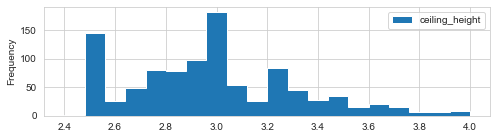

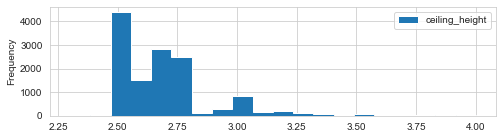

In [84]:
# высоты потолоков в центре и по всему городу
for df in [realty_spb_center, realty_spb]:
    df.plot(kind='hist', y='ceiling_height', bins=20, histtype='stepfilled', grid=True, figsize=(8, 2))

count      1001.000000
mean     124541.463536
std       37464.401124
min       17391.000000
25%       97183.000000
50%      116406.000000
75%      141304.000000
max      292307.000000
Name: meter_price, dtype: float64 count     13209.000000
mean     108510.443637
std       26742.147603
min         111.000000
25%       90609.000000
50%      103333.000000
75%      121052.000000
max      292307.000000
Name: meter_price, dtype: float64


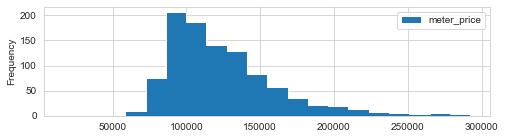

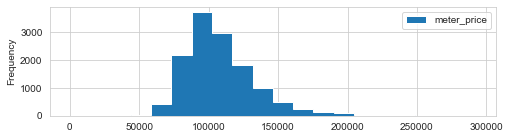

In [85]:
# различие в стоимости квадратного метра в центре СПб и по всему городу
for df in [realty_spb_center, realty_spb]:
    df.plot(kind='hist', y='meter_price', bins=20, histtype='stepfilled', grid=True, figsize=(8, 2))

print(realty_spb_center['meter_price'].describe(), realty_spb['meter_price'].describe()) # смотрим на медианные значения


### Влияние расстояния на цену квадратного метра

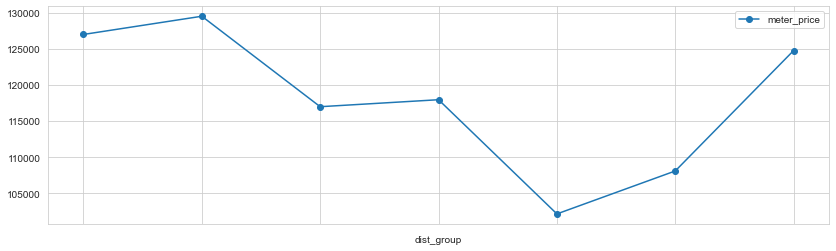

In [86]:
realty_spb_center['dist_group'] = pd.cut(realty_spb_center['cityCenters_nearest'], 7)
center_dist_gr = realty_spb_center.groupby('dist_group')['meter_price'].agg('median').reset_index()
center_dist_gr.plot('dist_group', 'meter_price', style='o-', figsize=(14, 4))

### Влияние этажности на стоимость квартир в центре СПб

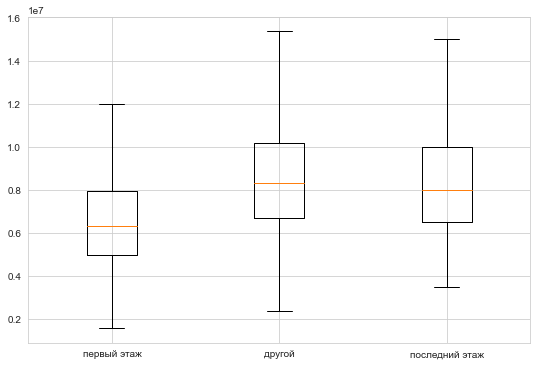

In [87]:
# взял отсюда http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
collectn_1 = realty_spb_center.query('floor_category == "первый"')['last_price']
collectn_2 = realty_spb_center.query('floor_category == "другой"')['last_price']
collectn_3 = realty_spb_center.query('floor_category == "последний"')['last_price']

# объедим их в список    
data_to_plot = [collectn_1, collectn_2, collectn_3]

# зададим область графика и подпишем оси
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.set_xticklabels(['первый этаж', 'другой', 'последний этаж'])
# построим боксплот
bp = ax.boxplot(data_to_plot, showfliers=False)

### Факторы наиболее влиющие на цену квадратного метра в Санкт-Петербурга (центр и целиком)

In [89]:
realty_spb.corr()['meter_price'].sort_values()
# цена квадратного метра для всего СПб снижается при увеличении расстояния до центра, увеличении количества комнат или жилой площади; 
# к увеличению цены квадратного метра приводит приближение к центру города, увеличение площади кухни, а также высоты потолков.

cityCenters_km        -0.347691
cityCenters_nearest   -0.347211
living_to_total       -0.287421
rooms                 -0.233671
living_area           -0.121871
ponds_nearest         -0.087521
month                 -0.023057
airports_nearest      -0.015315
weekday                0.000092
total_area             0.011916
is_apartment           0.014258
open_plan              0.016994
days_exposition        0.027825
balcony                0.043145
studio                 0.044277
parks_nearest          0.081627
year                   0.117072
parks_around3000       0.121501
total_images           0.132434
floor                  0.138774
ponds_around3000       0.152107
floors_total           0.155503
kitchen_to_total       0.271076
ceiling_height         0.284494
kitchen_area           0.298738
price_of_km            0.388204
last_price             0.595220
meter_price            1.000000
Name: meter_price, dtype: float64

In [90]:
realty_spb_center.corr()['meter_price'].sort_values()
# ключевым фактором приводящим к снижению цены квадратного метра для центра Санкт-Петербуга является увеличение числа комнат;
# к увеличению - расстояние до центра;
# также гораздо меньшее влияния по сравнению со всем городом оказывают параметры площадь кухни и высота потолков.

rooms                 -0.323798
living_area           -0.272239
total_area            -0.229300
living_to_total       -0.162919
cityCenters_km        -0.097644
cityCenters_nearest   -0.078679
ponds_nearest         -0.053085
open_plan             -0.019454
month                 -0.011176
ponds_around3000      -0.009611
studio                -0.003348
days_exposition       -0.000277
weekday                0.005324
ceiling_height         0.057422
parks_nearest          0.070198
parks_around3000       0.071374
is_apartment           0.081058
kitchen_area           0.082698
year                   0.092206
airports_nearest       0.110436
floor                  0.122658
balcony                0.128408
floors_total           0.144582
total_images           0.162920
kitchen_to_total       0.210278
price_of_km            0.396219
last_price             0.596997
meter_price            1.000000
Name: meter_price, dtype: float64

### Выводы

__Основные допущения и изменения в данных:__
- пропуски в жилой площади заполненны через среднее отношение жилой площади к общей;
- все расчеты получены на датафрейме из которого удалены объекты с выбивающимися значениями: количества комнат (7 и более), этажностью (менее 2 и более 4 метров), ценой (более 20 млн.);
- в данных по зависимости цены по мере удаления от Санкт-Петербурга не учтены примерно 20% объектов для которых стоят пропуски в гео-метках.

__Общие факты:__
- стоимость квартиры варьируется от 1 до 30 млн., среднее значение порядка 5 млн. руб.; цена одного квадратного метра меняется от 20 до 200 тыс.руб при среднем значение порядка 100 тыс.руб.;
- самая высокая цена квадратного метра из списка топ10 в Санкт-Петербурге - 103 тыс/кв.м, самая низкая в Стрельне - 87 тыс/кв.м. При этом цена в поселке Лисий нос составляет 122 тыс/кв.м, но по этому населенному пункту всего 2 объекта, по нему нужно больше ~~золота~~ данных;
- цена в Санкт-Петербурге начинает быстро расти при уменьшении расстояния до центра до 4 км и менее.
- цена в центре Санкт-Петербурге в среднем на 50% выше, чем по всему Петербургу; 
- в центре значительно больше вариантов стоимостью более 20 млн. руб., высотой потолков 3 метра и более;
- также варианты в центре в среднем имеют бОльшую общую и жилую площади (особенного много вариантов с полощадью от 100 м2);
- в среднем продажа занимает от 90 до 230 дней; если объявление было активно до 42 дней, то считаем сделку быстрой, если  более 224 дней - долгой;

__Наиболее сильно на цену квартиры влияют:__
- в центре СПб: расстояние до центра (коэф. корреляции +0.40) и количество комнат (-0.32); во всем городе - расстояние до центра (+0.39), площадь кухни (+0.29), высота потолков (+0.28), количество комнат (-0.23).
- расстояние до центра Санкт-Петербурга, по мере удаления от города цена квартир снижается, но есть объекты находящиеся дальше, но стоят дороже. Сильно выделяются по цене объекты в населенных пунктах: Лисий Нос, Сестрорецк, Зеленогорск, Левашово, Петергоф, Пушкин. Скорее всего тут влияние других факторов: престижности района, близости Финского залива и т.п.;
- чем больше комнат, тем цена квадратного метра ниже (варианты с шестью комнатами сильно выбиваются, по ним мало данных), в среднем увеличение на одну комнату снижает стоимость квадратного метра на 5 тыс.руб;
- этаж квартиры, объекты на первом и последних этажах дешевле на 12-17%;

__Почти не оказывают влияния:__
- день недели и месяц размещения объявления, при этом количество объявлений размещенных на выходных, а также в декабре-январе и мае-августе меньше примерно в 1.5-2 раза;
- в зависимости от года цены меняются в пределах 10%; стоит заметить, что в 2014 цена выше средней в 1.5 раза, но данных за 2014 мало, доверять этому факту не стоит.

### Шаг 5. Общий вывод

В работе проведена предварительна обработка данных, пропуски в жилой площади и площади кухни заполененны по медианным значениям их отношения к общей площади, пропуски в высоте потолков по типичному значению для этажности домов. Рассчитаны и добавлены в таблицу стоимости одного километра, цена квадратного метра. Определен условный радиус центра Санкт-Петербурга (4км), где цена квадратного метра начинает быстро расти. 

Изучено влияние на цену квадратного метра таких параметров как близость к центру, количество комнат (жилая площадь), высота потолков, площадь кухни, этаж (первый, последний, прочие), посчитаны необходимые коэффициенты корреляции. Определена разница влияния параметров для центра Санкт-Петербурга и всего города целиком. Также определены параметры слабо или почти не влияющие на цену квадратного метра: количество балконов, тип планировки, день недели и месяц размещения объявления.